In [ ]:
!pip install -q geopandas
!pip install -q pysal
!pip install -q geoplot
!pip install -q rasterio

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 
     |████████████████████████████████| 16.7 MB 23.7 MB/s 
     |████████████████████████████████| 2.4 MB 6.3 MB/s 
     |████████████████████████████████| 147 kB 48.4 MB/s 
     |████████████████████████████████| 41 kB 576 kB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 60 kB 5.9 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 209 kB 47.5 MB/s 
     |████████████████████████████████| 5.7 MB 7.5 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 243 kB 47.8 MB/s 
     |████████████████████████████████| 179 kB 48.5 MB/s 
     |████████████████████████████████| 2.1 MB 35.9 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████

In [ ]:
# Bibliotecas
import geopandas as gpd
import math
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.transform import Affine
from scipy import stats
from shapely.geometry import Polygon, box
from sklearn.neighbors import KernelDensity

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Leitura dos arquivos
pontos = gpd.read_file('/content/estacoes_DF.geojson')
limite = gpd.read_file('/content/DF.geojson')

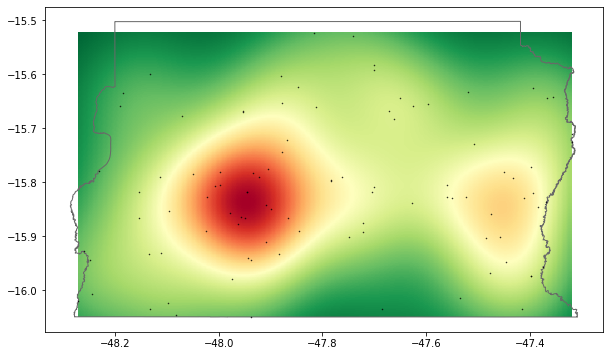

In [ ]:
# Coordenadas da camada de pontos
x = pontos["geometry"].x
y = pontos["geometry"].y

# Coordenadas mínimas e máximas da camada de pontos
min_x, min_y, max_x, max_y = pontos.total_bounds

# Criando um grid com a extensão da camada de pontos
XX, YY = np.mgrid[min_x:max_x:100j, min_y:max_y:100j]

# Criando um array com as posições baseadas nas coordenadas
pos = np.vstack([XX.ravel(), YY.ravel()]).T

# Array com os valores de coordenadas
Xtrain = np.vstack([x, y]).T

# Calculando densidade Kernel
kde = KernelDensity(bandwidth = 0.08, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Ajustando o kernel ao array de coordenadas
kde.fit(Xtrain)

# Calculando exponencial da verosimilhança de cada amostra do modelo
Z = np.exp(kde.score_samples(pos))

# Voltando resultado para as dimensões da camada de pontos
Z = Z.reshape(XX.shape)

# Visualizando resultado
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z), cmap = "RdYlGn_r", extent = [min_x, max_x, min_y, max_y])
ax.plot(x, y, 'k.', markersize = 1, alpha = 0.9)
limite.plot(ax = ax, color = 'none', edgecolor = 'gray')
plt.show()